In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#========================================
# Define Save the Children colour palette
#========================================

sc_colors = {'red': '#da291c',
             'medium red' : '#ed7b73',
             'light red': '#f9d3d0',
             'purple': '#ae90c3',
             'medium purple': '#cebcdb',
             'light purple': '#efe9f3',
             'yellow': '#fecf28',
             'medium yellow': '#ffeca9',
             'light yellow': '#fff5d4',
             'blue': '#99cccc',
             'medium blue' : '#d6ebeb',
             'light blue' : '#ebf5f5',
             'green' : '#45b283',
             'medium green' : '#8dd3b5',
             'light green' : '#d9f0e6',
             'grey' : '#e7e6e6'}

mpl.rcParams['font.family'] = 'Calibri' 

In [5]:
#========================================
# Load data
#========================================

lo = pd.read_excel('../Data/Learning Outcomes Summary.xlsx')

In [6]:
#========================================
# Data wrangling
#========================================

# Convert to long format
lo_melt = lo.melt(id_vars=['lot', 'year', 'subject', 'treatment', 'sex'], 
                   var_name='data_point', 
                   value_name='value')

# Convert value column to numeric first
lo_melt['value'] = pd.to_numeric(lo_melt['value'], errors='coerce')

# Pivot the data so subject becomes columns
lo_pivot = lo_melt.pivot_table(
    index=['lot', 'year', 'treatment', 'sex', 'data_point'],
    columns='subject',
    values='value'
).reset_index()

# Create an average column
lo_pivot['Pooled'] = (lo_pivot['English'] + lo_pivot['Maths']) / 2

# Melt it back
lo_melt = lo_pivot.melt(
    id_vars=['lot', 'year', 'treatment', 'sex', 'data_point'],
    value_vars=['English', 'Maths', 'Pooled'],
    var_name='subject',
    value_name='value'
)

In [7]:
# Recode lot number to identify Save the Children

lo_melt['lot'] = lo_melt['lot'].replace({4: 'Save the Children'})

In [8]:
#========================================
# Create subsets for plotting
#========================================

maths_gains = lo_melt[(lo_melt['treatment']=='Treatment') &
                         (lo_melt['data_point']=='learning_gains') &
                         (lo_melt['sex']=='All Students') &
                         (lo_melt['subject']=='Maths')]

eng_gains = lo_melt[(lo_melt['treatment']=='Treatment') &
                    (lo_melt['data_point']=='learning_gains') &
                    (lo_melt['sex']=='All Students') &
                    (lo_melt['subject']=='English')]

save_maths = lo_melt[(lo_melt['treatment']=='Treatment') &
                    (lo_melt['data_point']=='learning_gains') &
                    (lo_melt['lot']=='Save the Children') &
                    (lo_melt['subject']=='Maths')]

save_eng = lo_melt[(lo_melt['treatment']=='Treatment') &
                    (lo_melt['data_point']=='learning_gains') &
                    (lo_melt['lot']=='Save the Children') &
                    (lo_melt['subject']=='English')]

save_gains = lo_melt[(lo_melt['treatment']=='Treatment') &
                    (lo_melt['data_point']=='learning_gains') &
                    (lo_melt['sex']=='Boys')]

save_gains = lo_melt[(lo_melt['treatment']=='Treatment') &
                    (lo_melt['data_point']=='learning_gains') &
                    (lo_melt['sex']=='Girls')]

boys_gains = lo_melt[(lo_melt['treatment']=='Treatment') &
                    (lo_melt['data_point']=='learning_gains') &
                    (lo_melt['lot']=='Save the Children') &
                    (lo_melt['sex']=='Boys')]

girls_gains = lo_melt[(lo_melt['treatment']=='Treatment') &
                    (lo_melt['data_point']=='learning_gains') &
                    (lo_melt['lot']=='Save the Children') &
                    (lo_melt['sex']=='Girls')]

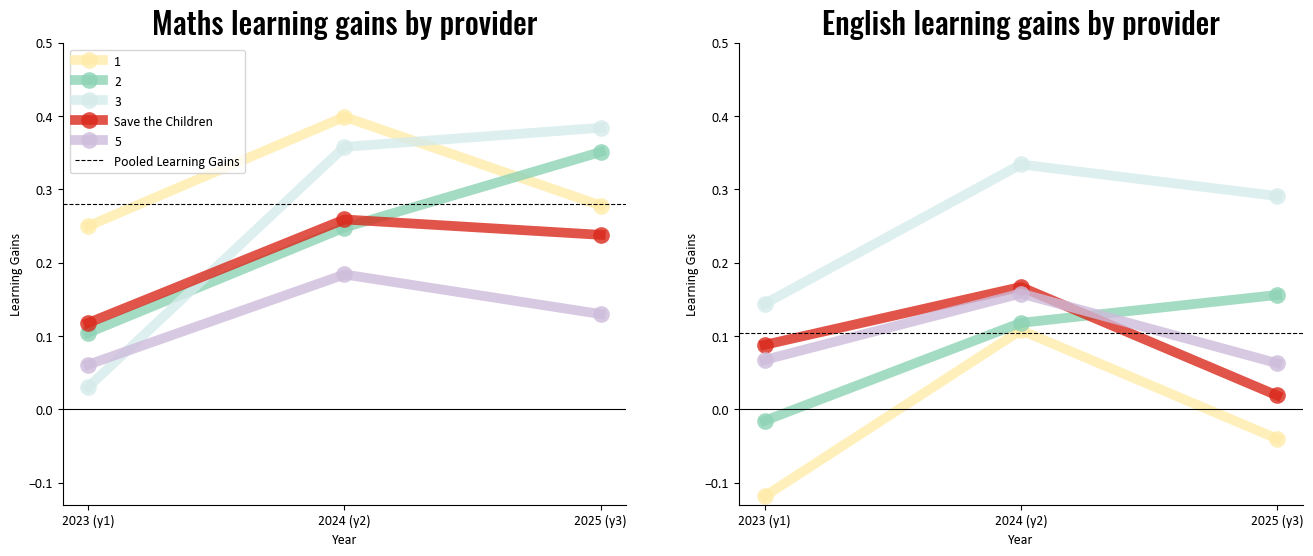

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

#========================================   
# Plot: Maths learning gains by provider
#========================================

sns.lineplot(data=maths_gains,
             x='year', 
             y='value', 
             hue='lot', 
             linewidth=7, 
             alpha=0.8,   
             palette = {1: sc_colors['medium yellow'], 
                        2: sc_colors['medium green'], 
                        3: sc_colors['medium blue'], 
                        'Save the Children': sc_colors['red'],
                        5: sc_colors['medium purple']},  
             marker='o', 
             markersize=12,  
             markeredgewidth=0,  
             markeredgecolor='black',  
             ax=ax[0]
             )

ax[0].set_title('Maths learning gains by provider', fontname='Oswald', fontsize=22)
ax[0].axhline(.280, color='black', linewidth=0.8, linestyle='--', label='Pooled Learning Gains')
ax[0].legend(title=False, loc='upper left')

#========================================   
# Plot: English learning gains by provider
#========================================

sns.lineplot(data=eng_gains, 
             x='year', 
             y='value', 
             hue='lot',
             linewidth=7, 
             alpha=0.8, 
             palette = {1: sc_colors['medium yellow'], 
                        2: sc_colors['medium green'], 
                        3: sc_colors['medium blue'], 
                        'Save the Children': sc_colors['red'],
                        5: sc_colors['medium purple']},
             marker='o', 
             markersize=12,  
             markeredgewidth=0,  
             markeredgecolor='black', 
             ax=ax[1]
             )

ax[1].set_title('English learning gains by provider', fontname='Oswald', fontsize=22)
ax[1].axhline(.104, color='black', linewidth=0.8, linestyle='--', label='Pooled Learning Gains')
ax[1].get_legend().remove()

#========================================   
# Common formatting across plots
#========================================

for ax in fig.axes:
    ax.axhline(0, color='black', linewidth=0.8, linestyle='-')
    ax.set_ylabel('Learning Gains')
    ax.set_ylim(-.13, .5)
    ax.set_xlabel('Year')
    ax.set_xticks([1, 2, 3])
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticklabels(['2023 (y1)', '2024 (y2)', '2025 (y3)'])

plt.savefig('../Results/gains_by_provider.png', dpi=300)

c:\Users\FTurner\OneDrive - Save the Children UK\Documents\06 Random Python Files\.venv\Lib\site-packages\matplotlib\text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
c:\Users\FTurner\OneDrive - Save the Children UK\Documents\06 Random Python Files\.venv\Lib\site-packages\matplotlib\text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


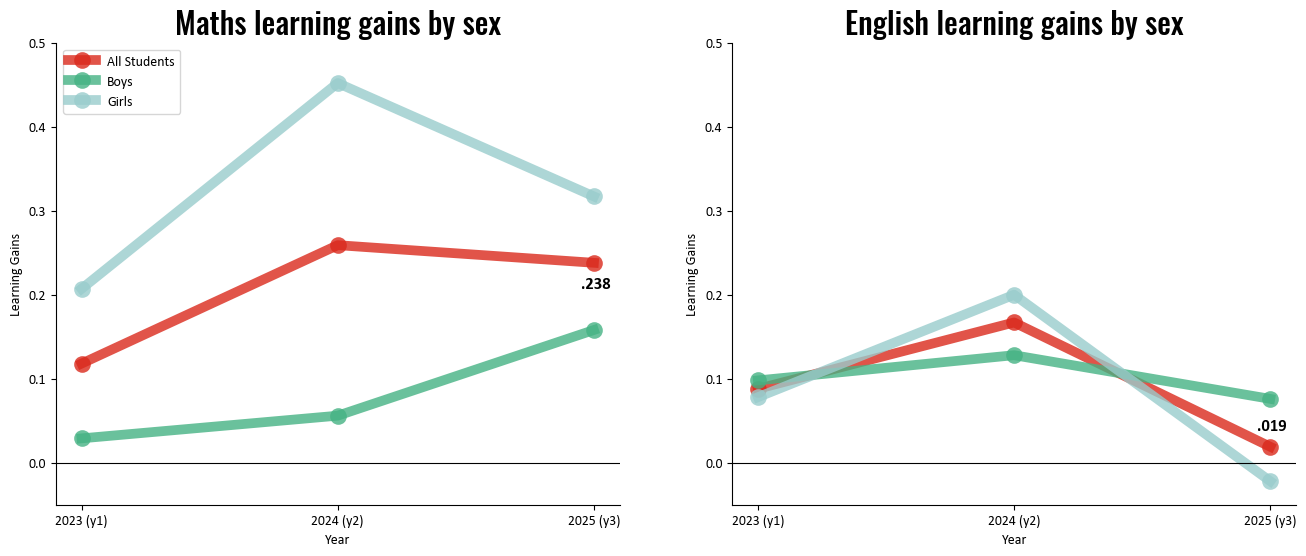

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

#========================================   
# Plot 1a: Maths learning gains by sex
#========================================

sns.lineplot(data=save_maths,
             x='year', 
             y='value', 
             hue='sex', 
             linewidth=7, 
             alpha=0.8,   
             palette = {'Boys': sc_colors['green'], 
                        'Girls': sc_colors['blue'], 
                        'All Students': sc_colors['red']},  
             marker='o', 
             markersize=12,  
             markeredgewidth=0,  
             markeredgecolor='black',  
             ax=ax[0]
             )

ax[0].set_title('Maths learning gains by sex', fontname='Oswald', fontsize=22)
# ax[0].axhline(.280, color='black', linewidth=0.8, linestyle='--', label='Pooled Learning Gains')
ax[0].legend(title=False, loc='upper left')
ax[0].text(2.95, save_maths[(save_maths['year']==3) & (save_maths['sex']=='All Students')]['value']-0.03, 
           '.238', fontsize=12, fontweight='bold')

#========================================   
# Plot 1b: English learning gains by sex
#========================================

sns.lineplot(data=save_eng, 
             x='year', 
             y='value', 
             hue='sex',
             linewidth=7, 
             alpha=0.8, 
             palette = {'Boys': sc_colors['green'], 
                        'Girls': sc_colors['blue'], 
                        'All Students': sc_colors['red']},
             marker='o', 
             markersize=12,  
             markeredgewidth=0,  
             markeredgecolor='black', 
             ax=ax[1]
             )

ax[1].set_title('English learning gains by sex', fontname='Oswald', fontsize=22)
ax[1].get_legend().remove()
# ax[1].axhline(.104, color='black', linewidth=0.8, linestyle='--', label='Pooled Learning Gains')


ax[1].text(2.95, save_eng[(save_eng['year']==3) & (save_eng['sex']=='All Students')]['value']+0.02, 
           '.019', fontsize=12, fontweight='bold')

#========================================   
# Common formatting across plots
#========================================

for ax in fig.axes:
    ax.axhline(0, color='black', linewidth=0.8, linestyle='-')
    ax.set_ylabel('Learning Gains')
    ax.set_ylim(-.05, .5)
    ax.set_xlabel('Year')
    ax.set_xticks([1, 2, 3])
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_xticklabels(['2023 (y1)', '2024 (y2)', '2025 (y3)'])
    
plt.savefig('../Results/gains_by_sex.png', dpi=300)

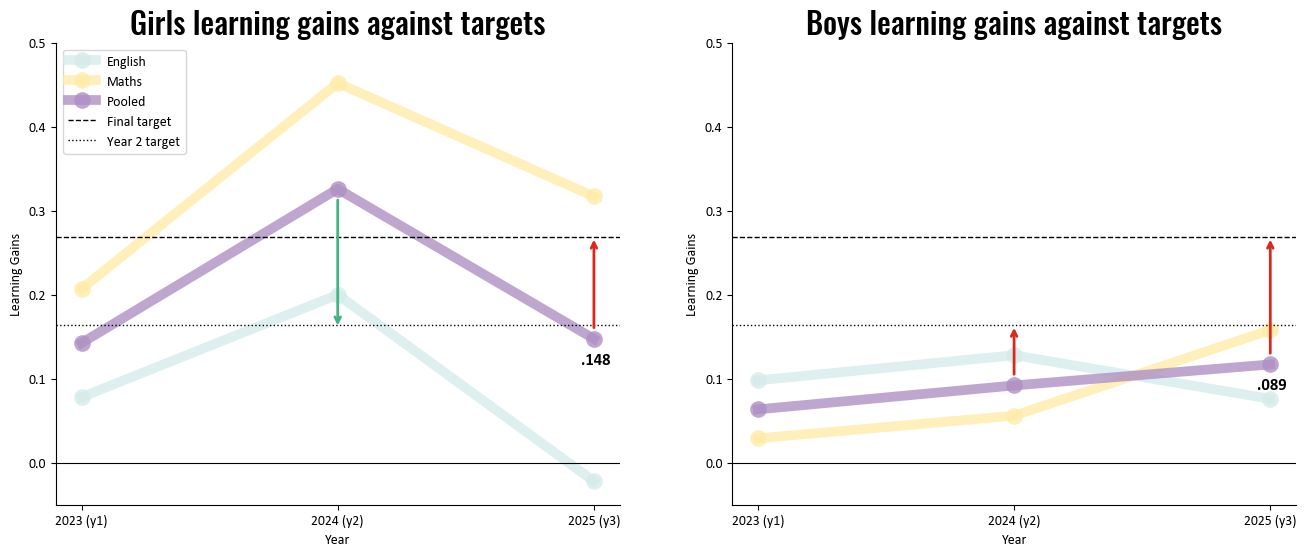

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

#=============================================   
# Plot 1: Girls Learning Gains against targets
#=============================================

sns.lineplot(data=girls_gains, x='year', y='value', hue='subject', linewidth=7, alpha=0.8, palette = {'Maths': sc_colors['medium yellow'], 
                                                                                                'English': sc_colors['medium blue'], 
                                                                                                'Pooled': sc_colors['purple']},   marker='o', 
                                                                                                            markersize=12,  
                                                                                                            markeredgewidth=0,  
                                                                                                            markeredgecolor='black',  ax=axes[0])
axes[0].set_title('Girls learning gains against targets', fontname='Oswald', fontsize=22)
axes[0].legend(title=False, loc='upper left')

#=============================================   
# Plot 2: Boys Learning Gains against targets
#=============================================

sns.lineplot(data=boys_gains, x='year', y='value', hue='subject', linewidth=7, alpha=0.8, palette = {'Maths': sc_colors['medium yellow'], 
                                                                                                'English': sc_colors['medium blue'], 
                                                                                                'Pooled': sc_colors['purple']},
                                                                                                            marker='o', 
                                                                                                            markersize=12,  
                                                                                                            markeredgewidth=0,  
                                                                                                            markeredgecolor='black', ax=axes[1])

axes[1].set_title('Boys learning gains against targets', fontname='Oswald', fontsize=22)

#========================================   
# Common formatting across plots
#========================================

for ax in fig.axes:
    ax.axhline(0, color='black', linewidth=0.8, linestyle='-')
    ax.axhline(.269, color='black', linewidth=1, linestyle='--', label = 'Final target')
    ax.axhline(.164, color='black', linewidth=1, linestyle=':', label = 'Year 2 target')
    ax.set_ylabel('Learning Gains')
    ax.set_ylim(-.05, .5)
    ax.set_xlabel('Year')
    ax.set_xticks([1, 2, 3])
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(title=False, loc='upper left')
    
    ax.set_xticklabels(['2023 (y1)', '2024 (y2)', '2025 (y3)'])

axes[1].get_legend().remove()

#========================================
# Extract pooled gains for annotations
#========================================

pooled_2024_girls = girls_gains[(girls_gains['subject']=='Pooled') & (girls_gains['year']==2)]['value'].values[0]
pooled_2024_boys = boys_gains[(boys_gains['subject']=='Pooled') & (boys_gains['year']==2)]['value'].values[0]

pooled_2025_girls = girls_gains[(girls_gains['subject']=='Pooled') & (girls_gains['year']==3)]['value'].values[0]
pooled_2025_boys = boys_gains[(boys_gains['subject']=='Pooled') & (boys_gains['year']==3)]['value'].values[0]

#===========================================
# Add arrows showing difference from target
#===========================================

axes[0].annotate('', xy=(2, .16), xytext=(2, (pooled_2024_girls)-.01),
            arrowprops=dict(arrowstyle='->', color=sc_colors['green'], lw=2))

axes[1].annotate('', xy=(2, .164), xytext=(2, pooled_2024_boys+.01),
            arrowprops=dict(arrowstyle='->', color=sc_colors['red'], lw=2))

axes[0].annotate('', xy=(3, .269), xytext=(3, pooled_2025_girls+.01),
            arrowprops=dict(arrowstyle='->', color=sc_colors['red'], lw=2))

axes[1].annotate('', xy=(3, .269), xytext=(3, pooled_2025_boys+.01),
            arrowprops=dict(arrowstyle='->', color=sc_colors['red'], lw=2))

axes[0].text(2.95, pooled_2025_girls-0.03, 
           '.148', fontsize=12, fontweight='bold')

axes[1].text(2.95, pooled_2025_boys-0.03, 
           '.089', fontsize=12, fontweight='bold')

plt.savefig('../Results/gains_against_targets.png', dpi=300)

In [12]:
#==========================================
# Prepare mean scores data for plotting
#==========================================

mean_scores = lo_melt[(lo_melt['data_point']=='mean score')]

save_means = mean_scores[(mean_scores['lot']=='Save the Children') &
                         (mean_scores['treatment']=='Treatment') &
                         (mean_scores['sex']=='All Students')]

control_means = mean_scores[(mean_scores['lot']=='Save the Children') &
                            (mean_scores['treatment']=='Control') &
                            (mean_scores['sex']=='All Students')]

both_means = mean_scores[(mean_scores['lot']=='Save the Children') &
                         (mean_scores['subject']=='Pooled') &
                         (mean_scores['sex']=='All Students')]

maths_means = mean_scores[(mean_scores['lot']=='Save the Children') &
                         (mean_scores['subject']=='Maths') &
                         (mean_scores['sex']=='All Students')]  

eng_means = mean_scores[(mean_scores['lot']=='Save the Children') &
                         (mean_scores['subject']=='English') &
                         (mean_scores['sex']=='All Students')]

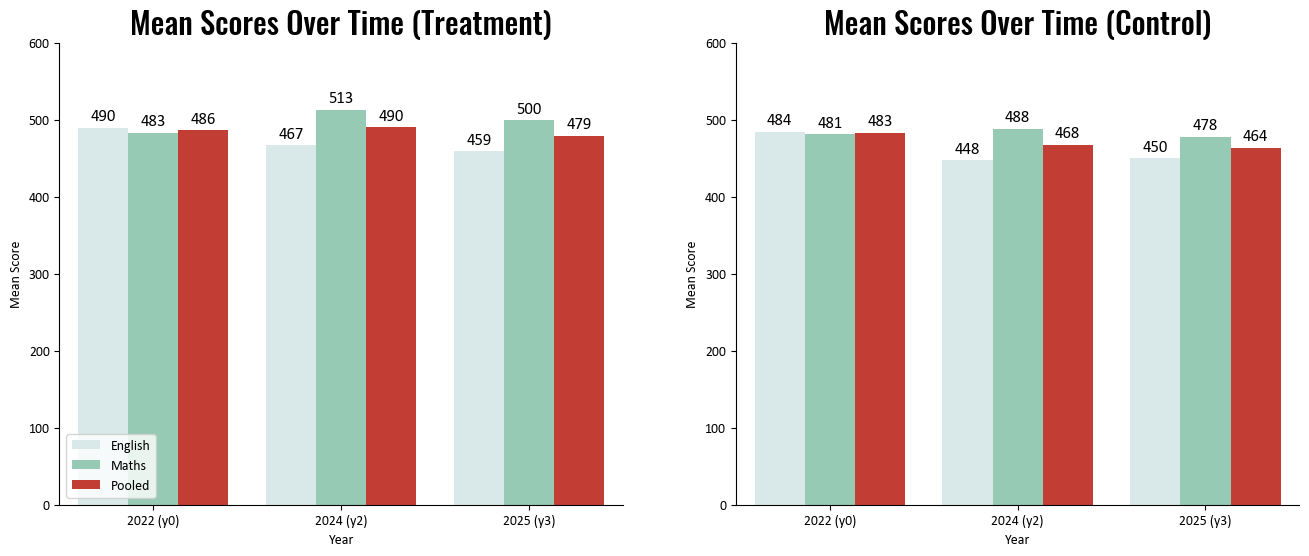

In [13]:
figure, ax = plt.subplots(1, 2, figsize=(16,6))

#=========================================================================   
# Plot 3a: Mean Scores Over Time in Schools Supported by Save the Children
#=========================================================================

sns.barplot(data=save_means, x='year', y='value', hue='subject',
                                                palette = {'Maths': sc_colors['medium green'], 
                                                            'English': sc_colors['medium blue'],
                                                            'Pooled': sc_colors['red']}, errorbar=None, ax=ax[0])

ax[0].set_title('Mean Scores Over Time (Treatment)', fontname='Oswald', fontsize=22)
ax[0].legend(title=False, loc='lower left')
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.0f', padding=3, fontsize=12)

#=========================================================================   
# Plot 3b: Mean Scores Over Time in Control Schools
#=========================================================================

sns.barplot(data=control_means, x='year', y='value', hue='subject', 
                                                    palette = {'Maths': sc_colors['medium green'], 
                                                             'English': sc_colors['medium blue'],
                                                                'Pooled': sc_colors['red']}, errorbar=None, ax=ax[1])

ax[1].set_title('Mean Scores Over Time (Control)', fontname='Oswald', fontsize=22)
ax[1].get_legend().remove()
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.0f', padding=3, fontsize=12)

#==========================================
# Common formatting across plots
#==========================================

for ax in figure.axes:
    ax.set_ylabel('Mean Score')
    ax.set_ylim(0, 600)
    ax.set_xlabel('Year')
    ax.set_xticks([0, 1, 2])
    ax.spines[['top', 'right']].set_visible(False)
    
    ax.set_xticklabels(['2022 (y0)', '2024 (y2)', '2025 (y3)'])

plt.savefig('../Results/meanscores_subject_year.png', dpi=300)